In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# cargo el archivo para volverlo un df
df = pd.read_csv(r'D:\0_Respaldo\0_Proyectos_2024\Henry_Labs\Lab2\Baires_Accidents\Data\RAW\hechos.csv', encoding='Latin-1')

In [3]:
df1 = df.copy()

In [4]:
df1.tail(5)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
10488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10491,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Solo voy a trabajar con las columnas:  VICTIMA == ['MOTO','PEATON'], 'AAAA' = 2021, 'MM', 'COMUNA'

In [5]:
df1 = df1[(df1['AAAA'] > 2019)]


In [6]:
df1 = df1[['AAAA','MM','VICTIMA','COMUNA','N_VICTIMAS']]

In [7]:
df1.tail()

,AAAA,MM,VICTIMA,COMUNA,N_VICTIMAS
691,2021.0,12.0,MOTO,7.0,1.0
692,2021.0,12.0,MOTO,9.0,1.0
693,2021.0,12.0,MOTO,11.0,1.0
694,2021.0,12.0,AUTO,9.0,1.0
695,2021.0,11.0,BICICLETA,1.0,1.0


### Exploracion

In [8]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 521 to 695
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AAAA        175 non-null    float64
 1   MM          175 non-null    float64
 2   VICTIMA     175 non-null    object 
 3   COMUNA      175 non-null    float64
 4   N_VICTIMAS  175 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.2+ KB


In [9]:
df1.describe()

,AAAA,MM,COMUNA,N_VICTIMAS
count,175.000000,175.000000,175.000000,175.000000
mean,2020.554286,6.720000,7.314286,1.017143
std,0.498471,3.904963,4.392859,0.130176
min,2020.000000,1.000000,1.000000,1.000000
25%,2020.000000,3.000000,3.000000,1.000000
50%,2021.000000,7.000000,7.000000,1.000000
75%,2021.000000,11.000000,11.000000,1.000000
max,2021.000000,12.000000,15.000000,2.000000


In [10]:
#Elimino los valores duplicados
df1 = df1.drop_duplicates()

In [11]:
df1.describe()

,AAAA,MM,COMUNA,N_VICTIMAS
count,163.000000,163.000000,163.000000,163.000000
mean,2020.564417,6.711656,7.460123,1.018405
std,0.497361,3.878914,4.397313,0.134825
min,2020.000000,1.000000,1.000000,1.000000
25%,2020.000000,3.000000,3.500000,1.000000
50%,2021.000000,7.000000,8.000000,1.000000
75%,2021.000000,11.000000,11.000000,1.000000
max,2021.000000,12.000000,15.000000,2.000000


In [12]:
# Cuento los valores para no encontrar un valor atipico.
df1['AAAA'].value_counts()

AAAA
2021.0    92
2020.0    71
Name: count, dtype: int64

In [13]:
df1['MM'].value_counts()

MM
12.0    25
1.0     20
11.0    17
2.0     16
5.0     15
8.0     14
6.0     11
3.0     10
10.0    10
7.0      9
9.0      9
4.0      7
Name: count, dtype: int64

In [14]:
df1['VICTIMA'].value_counts()

VICTIMA
MOTO           67
PEATON         63
AUTO           21
BICICLETA      10
PEATON_MOTO     1
PASAJEROS       1
Name: count, dtype: int64

#### Valores NAN 

In [15]:
#Exploro por valores nan
df1['AAAA'].isna().sum()

0

In [16]:
#Exploro por valores nan
df1['MM'].isna().sum()

0

In [17]:
#Exploro por valores nan
df1['COMUNA'].isna().sum()

0

In [18]:
#Exploro por valores nan
df1['N_VICTIMAS'].isna().sum()

0

In [19]:
df2 =df1.copy()

### Outlayers

#### Grafica de los datos

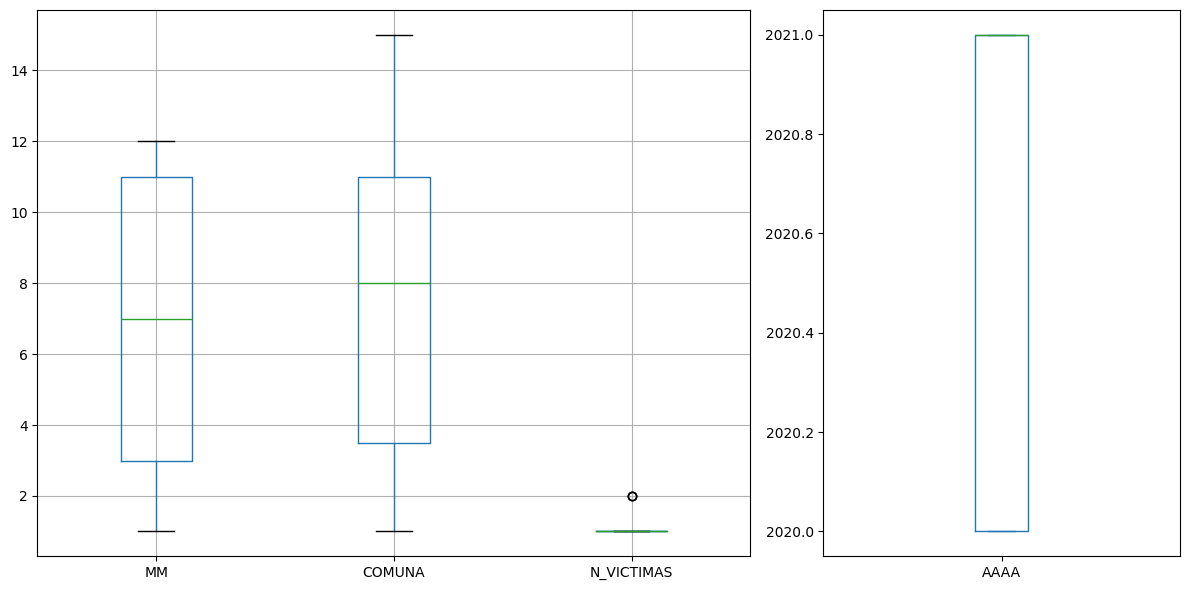

In [20]:
fig, axs = plt.subplots(1,2, figsize=(12,6), gridspec_kw={'width_ratios':[2,1]})

df2[df2.columns[df2.columns != 'AAAA']].boxplot(ax=axs[0])
df2['AAAA'].plot(kind='box', ax=axs[1])

plt.tight_layout()
plt.show()

Una vez graficada la muestra buscamos outlayers y encuentro que solo la columna 'N_victimas' presenta uno pero por el tamanio de la muestra se mantiene.

#### Grafica de correlacion

In [21]:
df3 = df2[df2.columns.difference(['VICTIMA'])].copy()

In [22]:
c_matriz =df3.corr()

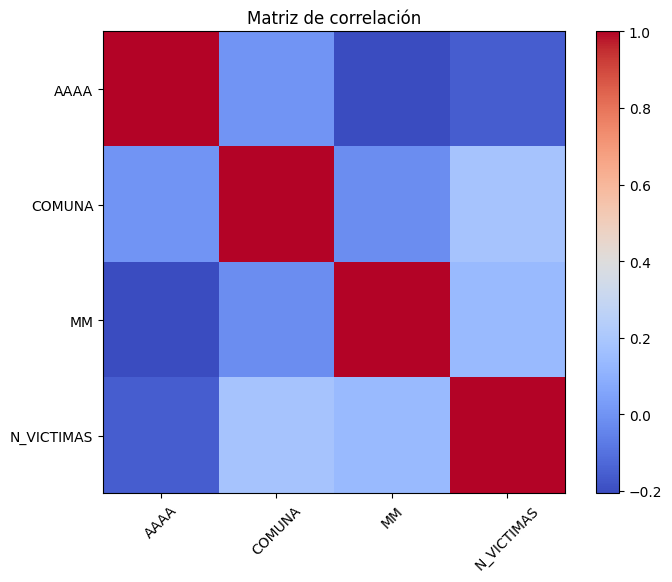

In [23]:
plt.figure(figsize=(8, 6))
plt.imshow(c_matriz, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de correlación')
plt.xticks(range(len(c_matriz.columns)), c_matriz, rotation=45)
plt.yticks(range(len(c_matriz.columns)), c_matriz.columns)
plt.show()

### Exporto los datos

In [24]:
df2.head(10)

,AAAA,MM,VICTIMA,COMUNA,N_VICTIMAS
521,2020.0,1.0,PEATON,15.0,1.0
522,2020.0,1.0,MOTO,7.0,1.0
523,2020.0,1.0,PEATON,3.0,1.0
524,2020.0,1.0,PEATON,1.0,1.0
525,2020.0,1.0,MOTO,3.0,1.0
526,2020.0,1.0,MOTO,8.0,1.0
528,2020.0,1.0,MOTO,2.0,1.0
529,2020.0,2.0,PEATON,5.0,1.0
530,2020.0,2.0,MOTO,1.0,1.0
531,2020.0,2.0,MOTO,5.0,1.0


In [25]:
df2.to_parquet(r'D:\0_Respaldo\0_Proyectos_2024\Henry_Labs\Lab2\Baires_Accidents\Data\Parquet\victimas_semestre.parquet', index=False)